In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import json
import time
import seaborn as sns

from scipy.stats import ks_2samp, chisquare



In [2]:
# fakePHSP = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/fake.txt'
fakePHSP_list=[]
fakePHSP_E56_s00 = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles/fake_E5.6_s0.0_.txt'
fakePHSP_E56_s40 = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles/fake_E5.6_s4.0_.txt'
fakePHSP_E60_s20 = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles/fake_E6.0_s2.0_.txt'
fakePHSP_E64_s00 = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles/fake_E6.4_s0.0_.txt'
fakePHSP_E64_s40 = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles/fake_E5.6_s4.0_.txt'
fakePHSP_list.append(fakePHSP_E56_s00)
fakePHSP_list.append(fakePHSP_E56_s40)
fakePHSP_list.append(fakePHSP_E60_s20)
fakePHSP_list.append(fakePHSP_E64_s00)
fakePHSP_list.append(fakePHSP_E64_s40)

truePHSP_list=[]
truePHSP__E56_s00 = '/data1/dose-3d-generative/data/gan-data/PHSPs_without_VR/ANGLE_0/Filtered_E5.6_s0.0.txt'
truePHSP__E56_s40 = '/data1/dose-3d-generative/data/gan-data/PHSPs_without_VR/ANGLE_0/Filtered_E5.6_s4.0.txt'
truePHSP__E60_s20 = '/data1/dose-3d-generative/data/gan-data/PHSPs_without_VR/ANGLE_0/Filtered_E6.0_s2.0.txt'
truePHSP__E64_s00 = '/data1/dose-3d-generative/data/gan-data/PHSPs_without_VR/ANGLE_0/Filtered_E6.4_s0.0.txt'
truePHSP__E64_s40 = '/data1/dose-3d-generative/data/gan-data/PHSPs_without_VR/ANGLE_0/Filtered_E6.4_s4.0.txt' 
#'/net/scratch/people/plgztabor/primo_workdir/PHSPs_without_VR/ANGLE_0/TXT/Filtered_E6.0_s2.0.txt'
truePHSP_list.append(truePHSP__E56_s00)
truePHSP_list.append(truePHSP__E56_s40)
truePHSP_list.append(truePHSP__E60_s20)
truePHSP_list.append(truePHSP__E64_s00)
truePHSP_list.append(truePHSP__E64_s40)

fake_list=[]
real_list=[]

start_time=time.time()
for filename in fakePHSP_list:
    file_start_time=time.time()
    f = open(filename,'rt')
    lines = f.readlines()
    f.close()

    fake = [r.split() for r in lines]
    fake = np.asarray(fake,dtype=np.float32)
    fake_list.append(fake)
    print('Time elapsed: %.2f min' % ((time.time() - file_start_time)/60))

for filename in truePHSP_list:
    f = open(filename,'rt')
    lines = f.readlines()
    f.close()

    real = [r.split() for r in lines]
    real = np.asarray(real,dtype=np.float32)

    np.random.seed(0)
    signs = np.random.randint(0,2,real.shape[0])*2-1
    real[:,0] = real[:,0]*signs
    real[:,1] = real[:,1]*signs
    real[:,2] = real[:,2]*signs
    real[:,3] = real[:,3]*signs
    real_list.append(real)
    print('Time elapsed: %.2f min' % ((time.time() - file_start_time)/60))

print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))




# bins = np.linspace(0, 6, 300)
# plt.figure(figsize = (10,10))
# plt.hist(real[:,5],bins,alpha=0.25,label='r',density=True)
# plt.hist(fake[:,5],bins,alpha=0.25,label='f',density=True)
# plt.legend(loc='upper right')
# #plt.show()

# import os
# for filename in os.listdir('/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles'):
#    with open(os.path.join('/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/FakePhotonsFiles', filename), 'r') as f: # open in readonly mode
#       print(filename)

Time elapsed: 0.69 min
Time elapsed: 0.62 min
Time elapsed: 0.60 min
Time elapsed: 0.57 min
Time elapsed: 0.59 min
Time elapsed: 1.61 min
Time elapsed: 2.39 min
Time elapsed: 3.37 min
Time elapsed: 4.67 min
Time elapsed: 5.87 min
Time elapsed: 8.35 min


In [3]:
conditions_keys=['E5.6_s0.0','E5.6_s4.0','E6.0_s2.0','E6.4_s0.0','E6.4_s4.0']
photons_parameters_keys=['X','Y','dX','dY','dZ','Ekin']
verification_points_list=[(5.6,0.0),(5.6,4.0),(6.0,2.0),(6.4,0.0),(6.4,4.0)]

In [4]:
evalreults_dict={"name":'config_001.json'}
ks_2samp_dict={}


ks_statistics_sum_all=0
ks_statistics_sum_all_list=[0,0,0,0,0,0]
# ks_pvalue_sum_all=0
# ks_statistics_sum_dict={}
# ks_statistics_list_dict={}
# ks_pvalue_sum_dict={}
# ks_pvalue_list_dict={}


for condition_key_index,condition_key_name in enumerate(conditions_keys):
    start_time=time.time()
    ks_statistics_sum=0
    ks_statistics_list=[]
    ks_pvalue_sum=0
    ks_pvalue_list=[]

    ks2samp_statistics_dict={}

    for index,parameter_name in enumerate(photons_parameters_keys):
        ks_statistic,ks_pvalue=ks_2samp(real_list[condition_key_index][:,index],fake_list[condition_key_index][:,index])
        ks_statistics_sum+=ks_statistic
        ks_pvalue_sum+=ks_pvalue
        ks_pvalue_list.append(ks_pvalue)
        ks_statistics_list.append(ks_statistic)

    ks_statistics_sum_all_list=[item1+item2 for item1, item2 in zip(ks_statistics_list,ks_statistics_sum_all_list)]
    ks_statistics_sum_all+=ks_statistics_sum
    print(ks_statistics_sum)
    print(ks_statistics_list)

    # print(ks_pvalue_sum)
    # print(ks_pvalue_list)

    ks2samp_statistics_dict['statistics_list']=ks_statistics_list
    ks2samp_statistics_dict['statistics_sum']=ks_statistics_sum
    ks_2samp_dict[condition_key_name]=ks2samp_statistics_dict

    # ks_statistics_list_dict[key_name]=ks_pvalue_list
    # ks_statistics_sum_dict[key_name]=ks_statistics_sum
    # ks_pvalue_list_dict[key_name]=ks_pvalue_list
    # ks_pvalue_sum_dict[key_name]=ks_pvalue_sum



    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

ks2samp_statistics_dict={}
ks2samp_statistics_dict['statistics_list']=ks_statistics_sum_all_list
ks2samp_statistics_dict['statistics_sum']=ks_statistics_sum_all
ks_2samp_dict['Summed']=ks2samp_statistics_dict
evalreults_dict['ks_2samp']=ks_2samp_dict

print(evalreults_dict)


0.041226989229049604
[0.0044678953605783445, 0.004501839268961305, 0.0037645703681463694, 0.003689249213207124, 0.012206846304286145, 0.012596588713870316]
Time elapsed: 0.42 min
0.03891264253691598
[0.003306589687598116, 0.0031186367830488004, 0.002183701960612683, 0.0018520195972877296, 0.006971960503605046, 0.021479734004763607]
Time elapsed: 0.39 min
0.026919675440153668
[0.0044312570469699775, 0.004315218475676508, 0.0017215228309189479, 0.0015212796280097418, 0.005787459623251445, 0.009142937835327047]
Time elapsed: 0.45 min
0.03120640465979546
[0.004611655665881592, 0.0045573184274840806, 0.003228269953023166, 0.0031151131196073545, 0.010591558743254403, 0.005102488750544865]
Time elapsed: 0.51 min
0.04005385374701266
[0.0016805886912587553, 0.0017072976445770618, 0.0011026053466723293, 0.0012776000573612167, 0.002978722442752005, 0.03130703956439129]
Time elapsed: 0.49 min
{'name': 'config_001.json', 'ks_2samp': {'E5.6_s0.0': {'statistics_list': [0.0044678953605783445, 0.004501

0.009562124019256686
[4.543895590797834e-06, 4.649345681441248e-06, 0.00045216208948014875, 0.00046598106768358673, 0.00825635964489832, 0.00037842797592239213]
Time elapsed: 0.23 min
0.0031187125322569395
[2.839520874489648e-06, 2.7086831256251794e-06, 8.438924372672779e-05, 6.634639259400451e-05, 0.002412945392729794, 0.0005494832992062981]
Time elapsed: 0.21 min
0.0035066821311598045
[5.055264843555838e-06, 5.122497935409921e-06, 9.220621618482101e-05, 9.087285386686282e-05, 0.0030207726726111076, 0.0002926526257180473]
Time elapsed: 0.22 min
0.01113210262424018
[4.786838022589382e-06, 4.586924297055257e-06, 0.0003747660022702223, 0.0003637315558631245, 0.010127435658790642, 0.00025679564499654693]
Time elapsed: 0.24 min
0.002066251205138526
[2.0834103105250314e-06, 2.0643252842393085e-06, 7.758000063863849e-05, 8.22103889198677e-05, 0.0012915074146093327, 0.0006108056653759225]
Time elapsed: 0.23 min
{'number_of_bins': 300, 'E5.6_s0.0': {'statistics_list': [4.543895590797834e-06, 4

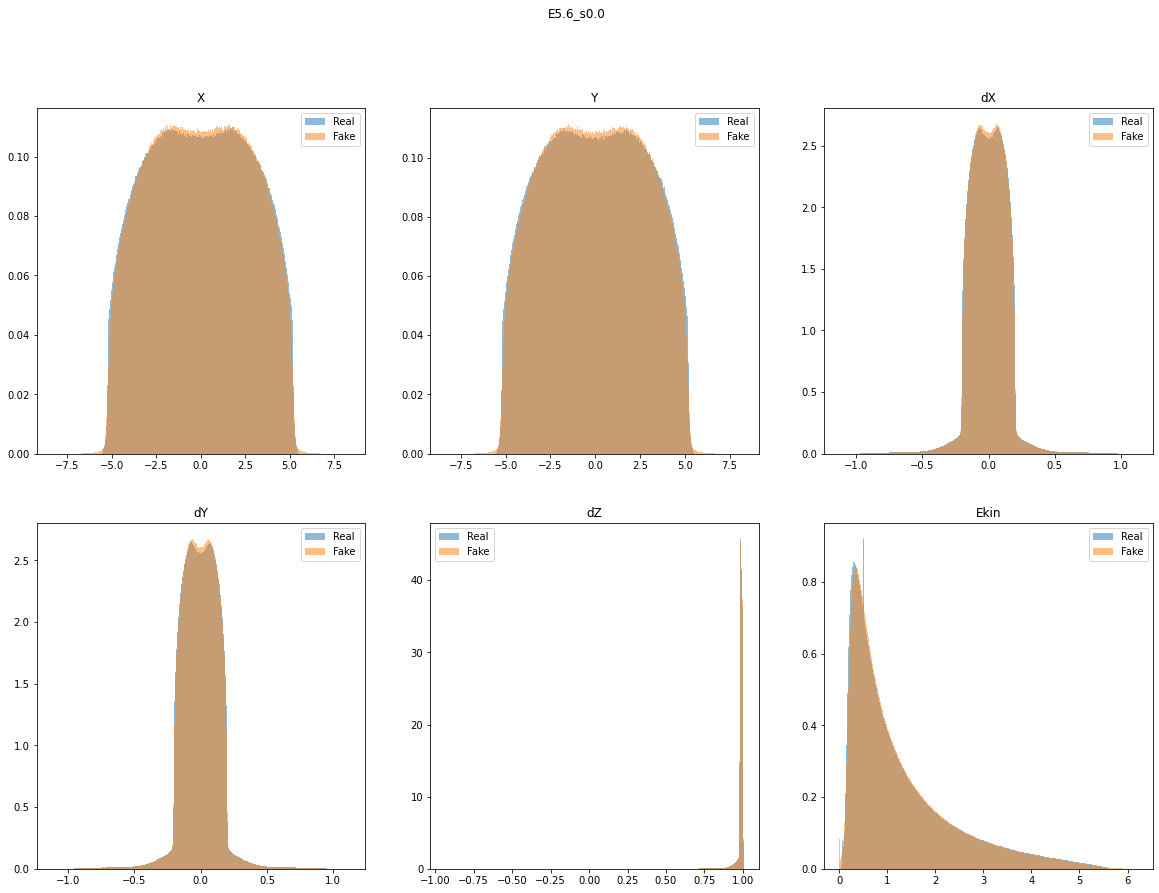

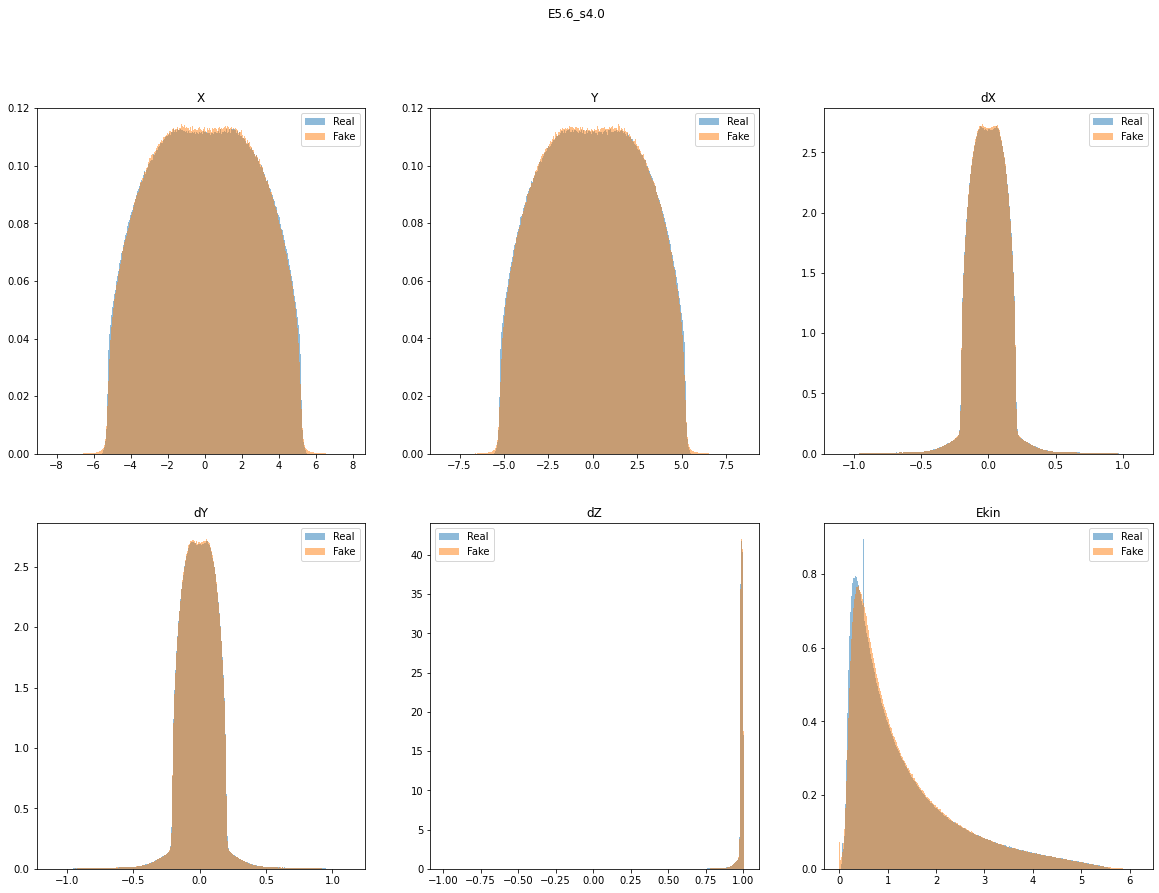

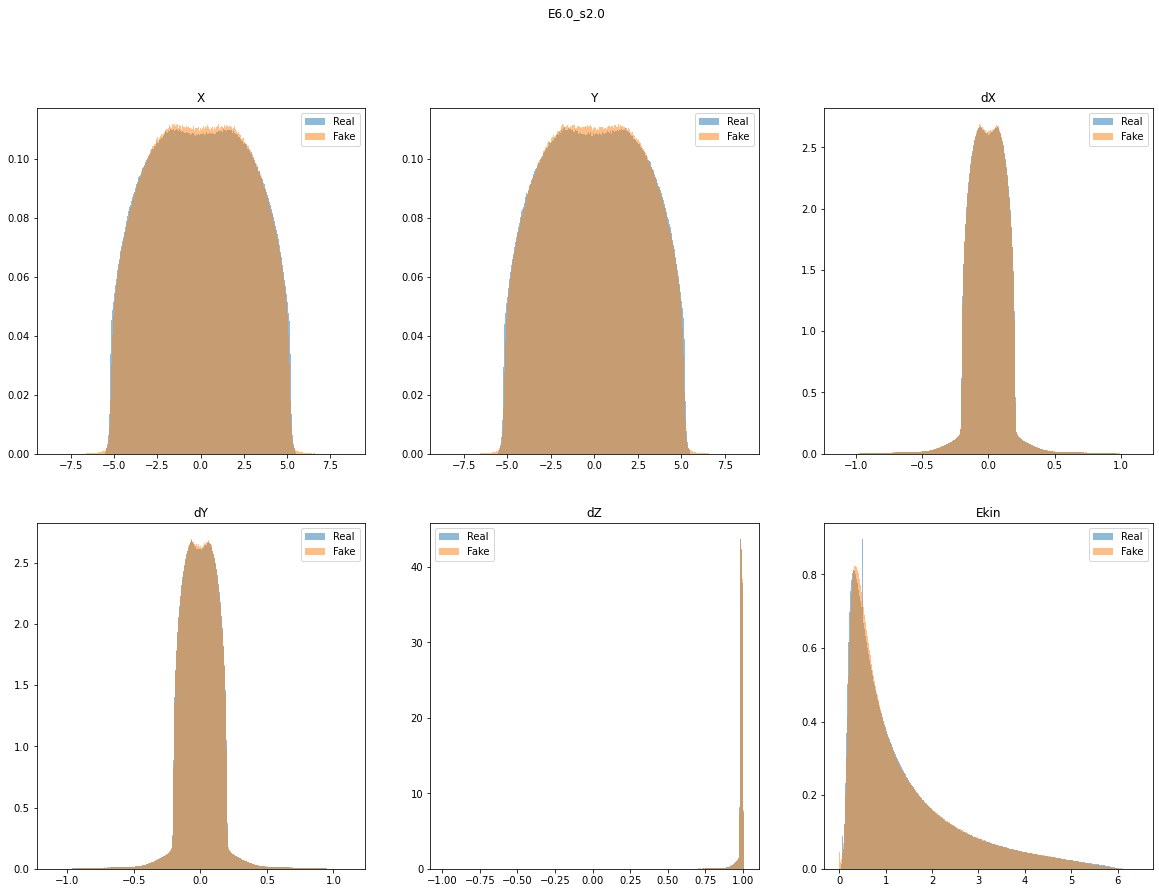

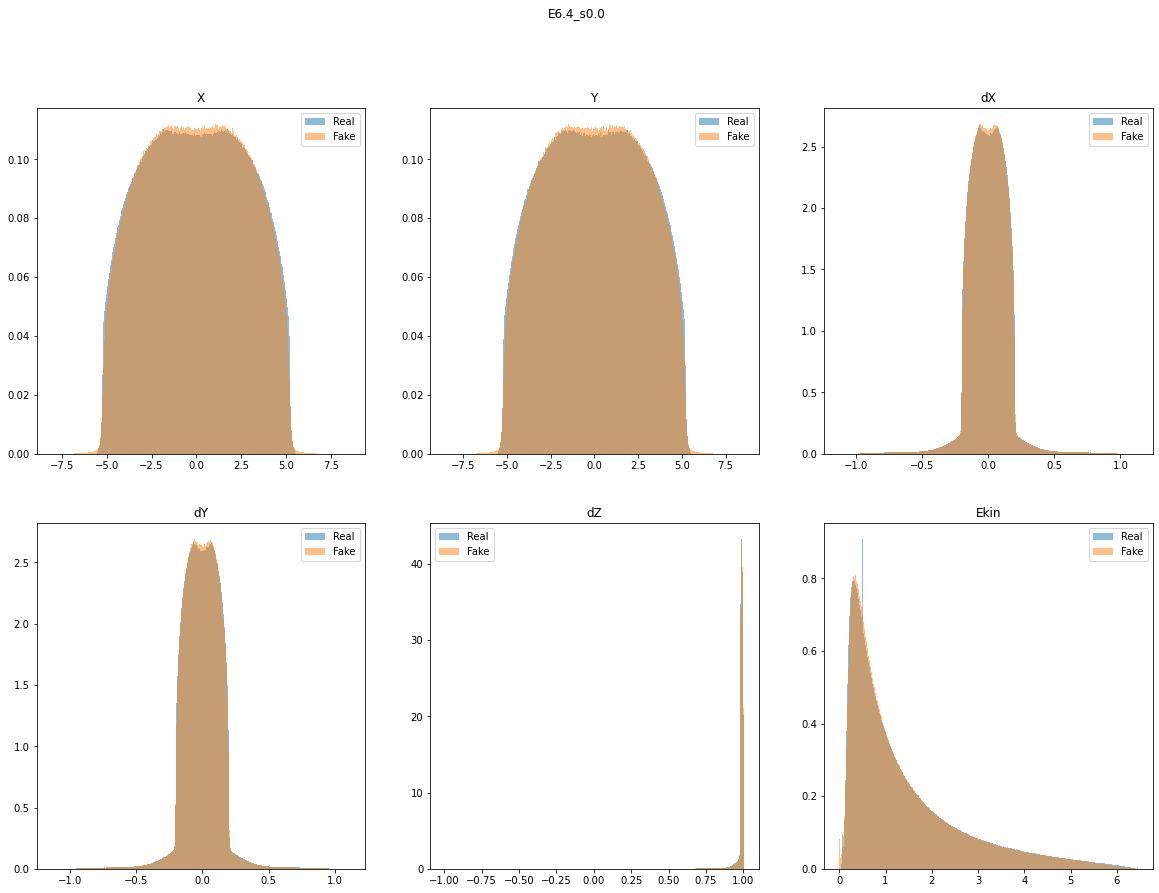

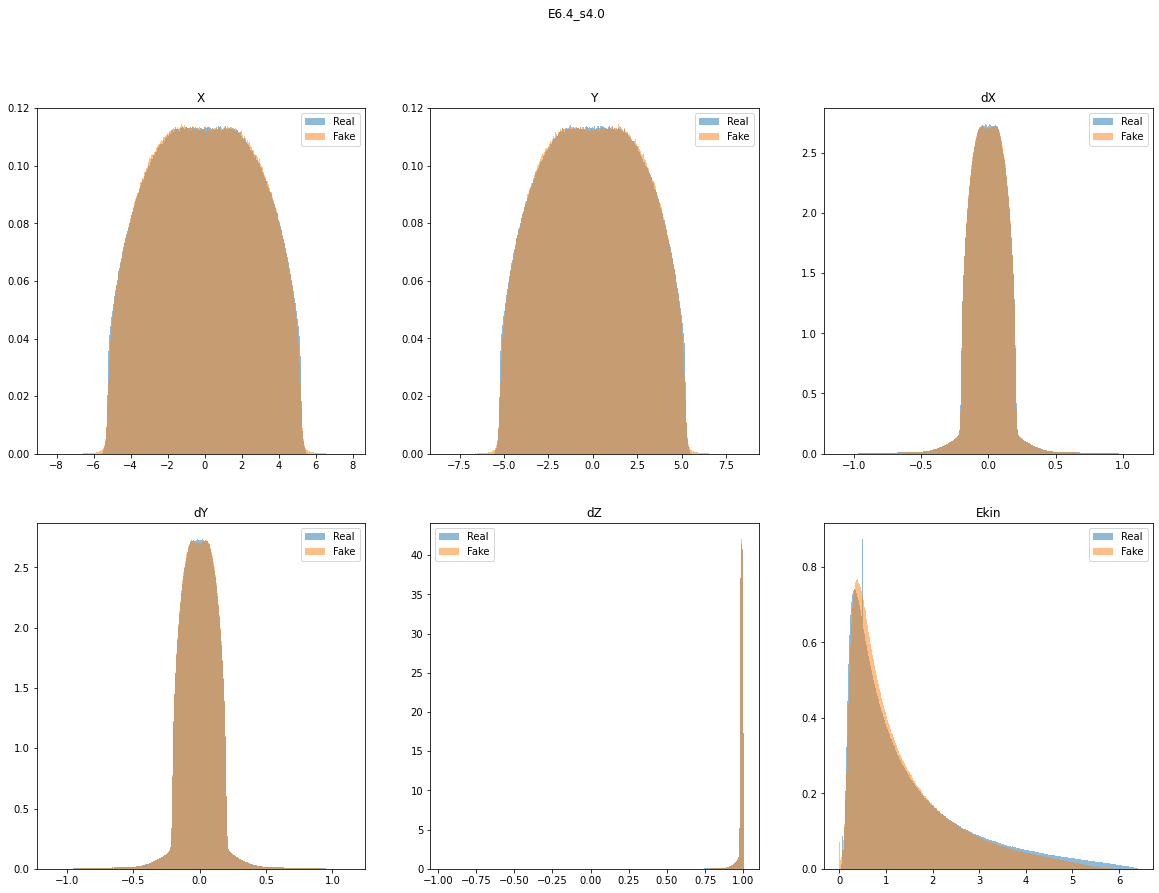

In [21]:
number_of_bins=300
mean_square_error_dict={"number_of_bins": 300}

mse_statistics_sum_all_list=[0,0,0,0,0,0]
mse_statistics_sum_all=0

for condition_key_index,condition_key_name in enumerate(conditions_keys):
    start_time=time.time()

    mse_statistics_dict={}

    histogram_freq_real_mse=[]
    histogram_freq_fake_mse=[]

    mse_statistics_sum=0
    mse_statistics_list=[]



    fig, axs = plt.subplots(2, 3)
    fig.set_size_inches(20, 14)
    fig.suptitle(condition_key_name)

    for index, photon_parameter in enumerate(photons_parameters_keys):
        mi = np.minimum(real_list[condition_key_index][:,index].min(), fake_list[condition_key_index][:,index].min())
        ma = np.maximum(real_list[condition_key_index][:,index].max(), fake_list[condition_key_index][:,index].max())

        bins = np.linspace(mi, ma, number_of_bins)
        tmp_histogram_freq_real_mse,_,_=axs.flatten()[index].hist(real_list[condition_key_index][:,index], bins, alpha=.5, density=True, stacked = True, label='Real')
        tmp_histogram_freq_fake_mse,_,_=axs.flatten()[index].hist(fake_list[condition_key_index][:,index], bins, alpha=.5, density=True, stacked = True, label='Fake')
        axs.flatten()[index].set_title(photon_parameter)
        axs.flatten()[index].legend()


        histogram_freq_real_mse.append(tmp_histogram_freq_real_mse)
        histogram_freq_fake_mse.append(tmp_histogram_freq_fake_mse)

        mse_statistic=mean_squared_error(tmp_histogram_freq_real_mse,tmp_histogram_freq_fake_mse)
        mse_statistics_sum+=mse_statistic
        mse_statistics_list.append(mse_statistic)

    print(mse_statistics_sum)
    print(mse_statistics_list)
    mse_statistics_sum_all+=mse_statistics_sum
    mse_statistics_sum_all_list=[item1+item2 for item1, item2 in zip(mse_statistics_list,mse_statistics_sum_all_list)]


    mse_statistics_dict['statistics_list']=mse_statistics_list
    mse_statistics_dict['statistics_sum']=mse_statistics_sum
    mean_square_error_dict[condition_key_name]=mse_statistics_dict
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

mse_statistics_dict={}
mse_statistics_dict['statistics_list']=mse_statistics_sum_all_list
mse_statistics_dict['statistics_sum']=mse_statistics_sum_all
mean_square_error_dict['Summed']=mse_statistics_dict

print(mean_square_error_dict)

evalreults_dict['mean_square_error']=mean_square_error_dict


In [6]:
with open('/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/config_001.json') as json_file:
    config_json_object = json.load(json_file)

In [7]:
config_json_object["evaluation_results"]=evalreults_dict

In [8]:
with open('/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/statistics_mse_ks2samp.json', 'w') as outfile:
    json.dump(config_json_object, outfile, indent=4)

0.03130703956439129
0.0011026053466723293


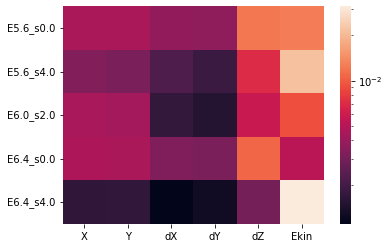

In [9]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

ks2samp_statistics_matrix=np.empty((5,6))
for condition_key_index, condition_key_name in enumerate(conditions_keys):
    ks2samp_statistics_matrix[condition_key_index]=np.asarray(evalreults_dict['ks_2samp'][condition_key_name]['statistics_list'])

ylabels=[name for name in conditions_keys]
xlabels=[name for name in photons_parameters_keys]


ax=sns.heatmap(ks2samp_statistics_matrix, xticklabels=xlabels, yticklabels=ylabels, norm=LogNorm(), square=True)

print(ks2samp_statistics_matrix.max())
print(ks2samp_statistics_matrix.min())

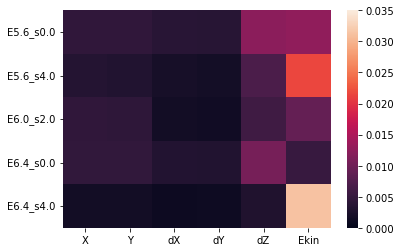

In [10]:
ax2=sns.heatmap(ks2samp_statistics_matrix, xticklabels=xlabels, yticklabels=ylabels, vmin=0, vmax=0.035)

0.07962878886889713
0.011455261615473167


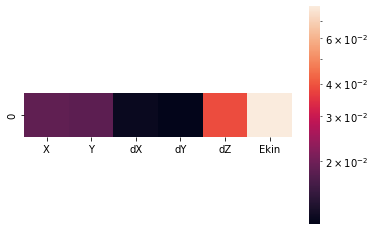

In [11]:
ks2samp_statistics_summed=np.empty((1,6))
ks2samp_statistics_summed[0]=np.asarray(evalreults_dict['ks_2samp']['Summed']['statistics_list'])

xlabels=[name for name in photons_parameters_keys]


print(ks2samp_statistics_summed.max())
print(ks2samp_statistics_summed.min())

ax=sns.heatmap(ks2samp_statistics_summed, xticklabels=xlabels, norm=LogNorm(), square=True, vmin=0, vmax=0.16)

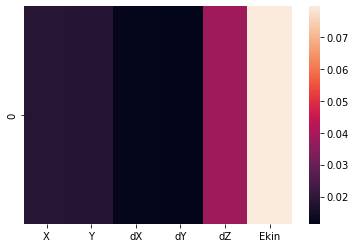

In [12]:
ax=sns.heatmap(ks2samp_statistics_summed, xticklabels=xlabels)

0.010127435658790642
2.0643252842393085e-06


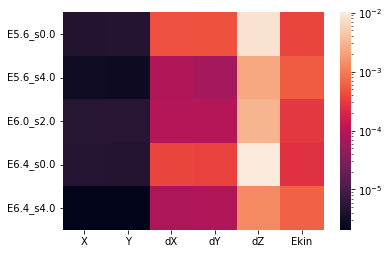

In [13]:
mse_statistics_matrix=np.empty((5,6))
for condition_key_index, condition_key_name in enumerate(conditions_keys):
    mse_statistics_matrix[condition_key_index]=np.asarray(evalreults_dict['mean_square_error'][condition_key_name]['statistics_list'])

print(mse_statistics_matrix.max())
print(mse_statistics_matrix.min())

ylabels=[name for name in conditions_keys]
xlabels=[name for name in photons_parameters_keys]

ax=sns.heatmap(mse_statistics_matrix, xticklabels=xlabels, yticklabels=ylabels, norm=LogNorm(), square=True)

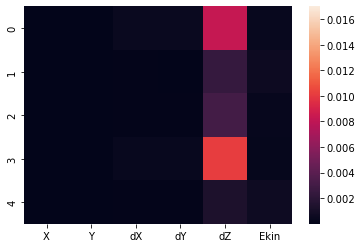

In [14]:
ax=sns.heatmap(mse_statistics_matrix, xticklabels=xlabels,vmin=1.5e-06,vmax=0.017)

0.025109020783639198
1.9131776323770914e-05


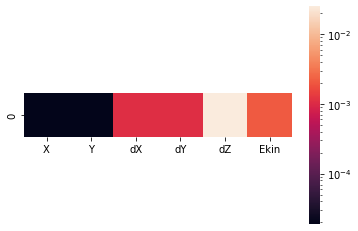

In [15]:
mse_statistics_summed=np.empty((1,6))
mse_statistics_summed[0]=np.asarray(evalreults_dict['mean_square_error']['Summed']['statistics_list'])

xlabels=[name for name in photons_parameters_keys]


print(mse_statistics_summed.max())
print(mse_statistics_summed.min())

ax=sns.heatmap(mse_statistics_summed, xticklabels=xlabels, norm=LogNorm(), square=True)

In [16]:
# import pickle
# paramsFileName = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/params.pkl'
# modelFileName = 'model.pth'

# infile = open(paramsFileName,'rb')
# params = pickle.load(infile)
# infile.close()